In [14]:
import os
import sys
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import time
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from joblib import dump

#Optimization
from sklearn.model_selection import GridSearchCV


In [2]:
# Loading train and test data CSV files
train_data = pd.read_csv(os.path.join(r'F:\Kabir\CSUN\R','training_data_final.csv'))
test_data = pd.read_csv(os.path.join(r'F:\Kabir\CSUN\R','testing_data_final.csv'))

In [3]:
train_data.head(2)

,sentiment_class,aake,aapki,aapse,abhorrent,ability,abject,able,abomination,abrasive,...,zoo,zoom,zoomedin,zoomers,zooming,zz,zürich,äckligt,åt,punctuation_percent
0,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.26
1,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [4]:
test_data.head(2)

,sentiment_class,aake,aapki,aapse,abhorrent,ability,abject,able,abomination,abrasive,...,zoo,zoom,zoomedin,zoomers,zooming,zz,zürich,äckligt,åt,punctuation_percent
0,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.06
1,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.08


In [5]:
# Defining class mappings
class_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Extract features (TF-IDF vectors) and labels from train data
X_train = train_data.drop(columns=['sentiment_class'])
y_train = train_data['sentiment_class'].map(class_mapping)

# Extract features (TF-IDF vectors) and labels from test data
X_test = test_data.drop(columns=['sentiment_class'])
y_test = test_data['sentiment_class'].map(class_mapping)

In [6]:
# Initialize SVM model

svm_model = SVC()

In [7]:
#Hyperparameterized tuning

start_time = time.time()
param_grid = {
    'C': [ 1, 2, 4, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)
print("Time taken for Hypertuning : {} seconds".format(round(time.time()-start_time, 3)))

Time taken for Hypertuning : 1586.123 seconds


In [8]:
# Get the best hyperparameters

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [9]:
X_test.head(2)

,aake,aapki,aapse,abhorrent,ability,abject,able,abomination,abrasive,abso,...,zoo,zoom,zoomedin,zoomers,zooming,zz,zürich,äckligt,åt,punctuation_percent
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.06
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.08


In [10]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
predictions = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.725


In [11]:
#Dump the model to use for stacking

dump(best_model, r'F:\Kabir\CSUN\R\svm_model_2.pkl')

['F:\\Kabir\\CSUN\\R\\svm_model_2.pkl']

In [12]:
# Generating confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[116  12  58]
 [ 19  83  36]
 [ 46  16 294]]


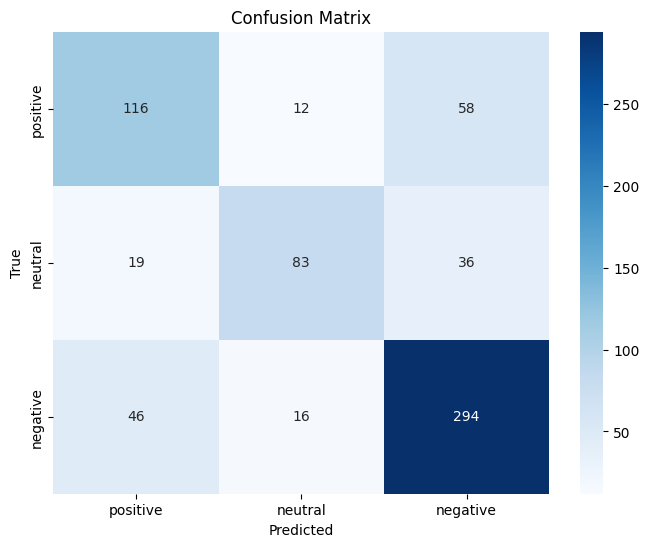

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
     

In [16]:
# Calculate F1-score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.7219635590898045


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       186
           1       0.75      0.60      0.67       138
           2       0.76      0.83      0.79       356

    accuracy                           0.73       680
   macro avg       0.72      0.68      0.70       680
weighted avg       0.72      0.72      0.72       680

